In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Für bessere Plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("Alle Bibliotheken erfolgreich importiert!")


Alle Bibliotheken erfolgreich importiert!


In [3]:
# Daten laden
df = pd.read_csv('../data/Mall_Customers.csv')

print("Dataset erfolgreich geladen")
print(f"Anzahl der Zeilen: {df.shape[0]}")
print(f"Anzahl der Spalten: {df.shape[1]}")


Dataset erfolgreich geladen
Anzahl der Zeilen: 200
Anzahl der Spalten: 5


In [4]:
# Erste Datenübersicht
print("=" * 50)
print("ERSTE 5 ZEILEN")
print("=" * 50)
display(df.head())

print("\n" + "=" * 50)
print("LETZTE 5 ZEILEN")
print("=" * 50)
display(df.tail())

ERSTE 5 ZEILEN


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



LETZTE 5 ZEILEN


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
# Spalten-Information
print("=" * 50)
print("SPALTEN-INFORMATION")
print("=" * 50)
print(df.info())

SPALTEN-INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [6]:
# Zelle 5: Fehlende Werte prüfen
print("=" * 50)
print("FEHLENDE WERTE:")
print("=" * 50)
print(df.isnull().sum())

FEHLENDE WERTE:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
# Statistische Zusammenfassung
print("=" * 50)
print("STATISTISCHE ZUSAMMENFASSUNG:")
print("=" * 50)
display(df.describe())

STATISTISCHE ZUSAMMENFASSUNG:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# Kategorische Variablen untersuchen
print("=" * 50)
print("GESCHLECHTER-VERTEILUNG:")
print("=" * 50)
print(df['Gender'].value_counts())
print("\nProzentual:")
print(df['Gender'].value_counts(normalize=True) * 100)

GESCHLECHTER-VERTEILUNG:
Gender
Female    112
Male       88
Name: count, dtype: int64

Prozentual:
Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


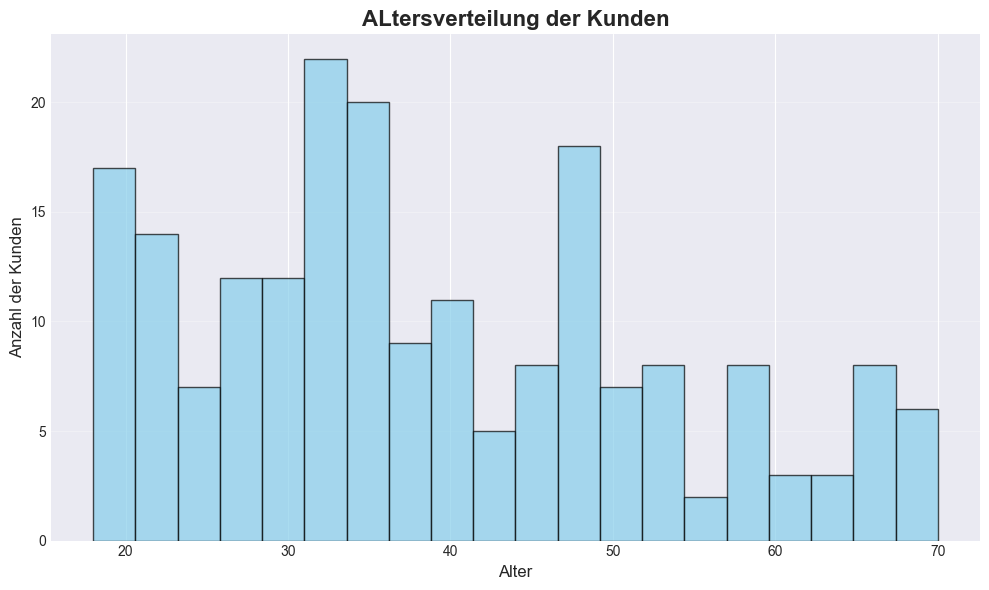

Alterverteilung gespeichert in outputs/01_age_distribution.png


In [13]:
# Altersverteilung
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('ALtersverteilung der Kunden', fontsize=16, fontweight='bold')
plt.xlabel('Alter', fontsize=12)
plt.ylabel('Anzahl der Kunden', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/01_age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Alterverteilung gespeichert in outputs/01_age_distribution.png")

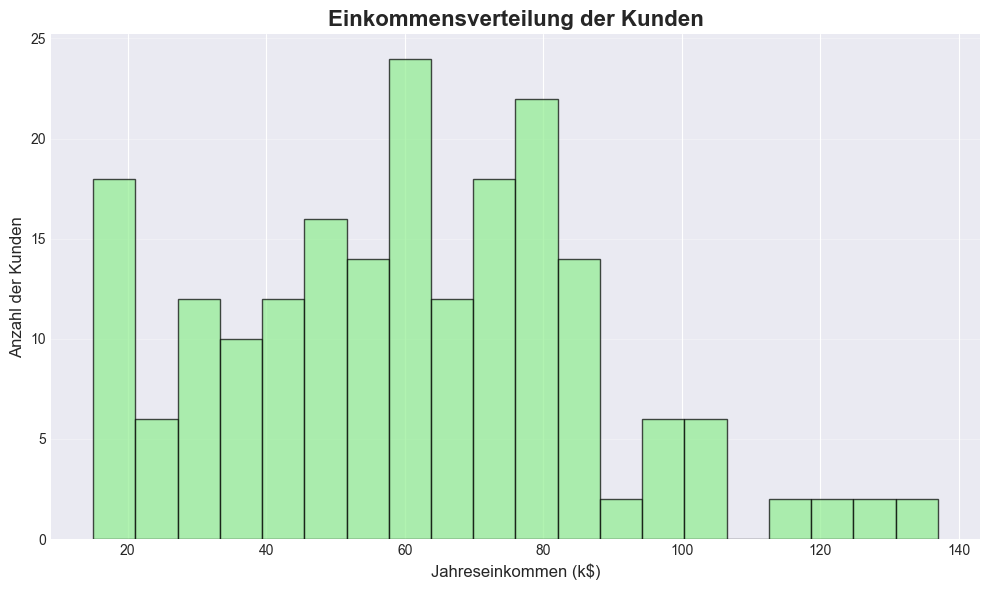

Einkommensverteilung gespeichert in outputs/02_income_distribution.png


In [17]:
# Einkommensverteilung
plt.figure(figsize=(10, 6))
plt.hist(df['Annual Income (k$)'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Einkommensverteilung der Kunden', fontsize=16, fontweight='bold')
plt.xlabel('Jahreseinkommen (k$)', fontsize=12)
plt.ylabel('Anzahl der Kunden', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/02_income_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Einkommensverteilung gespeichert in outputs/02_income_distribution.png")

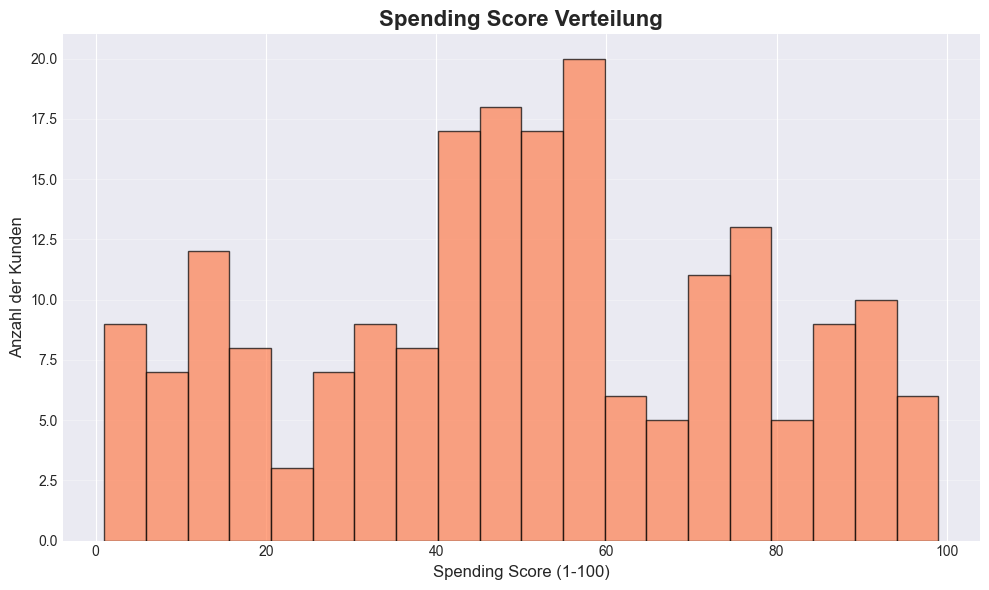

Spending Score Verteilung gespeichert in outputs/03_spending_distrubution.png


In [20]:
# Spending Score Verteilung
plt.figure(figsize=(10, 6))
plt.hist(df['Spending Score (1-100)'], bins=20, color='coral', edgecolor='black', alpha=0.7)
plt.title('Spending Score Verteilung', fontsize=16, fontweight='bold')
plt.xlabel('Spending Score (1-100)', fontsize=12)
plt.ylabel('Anzahl der Kunden', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/03_spending_distrubution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Spending Score Verteilung gespeichert in outputs/03_spending_distrubution.png")

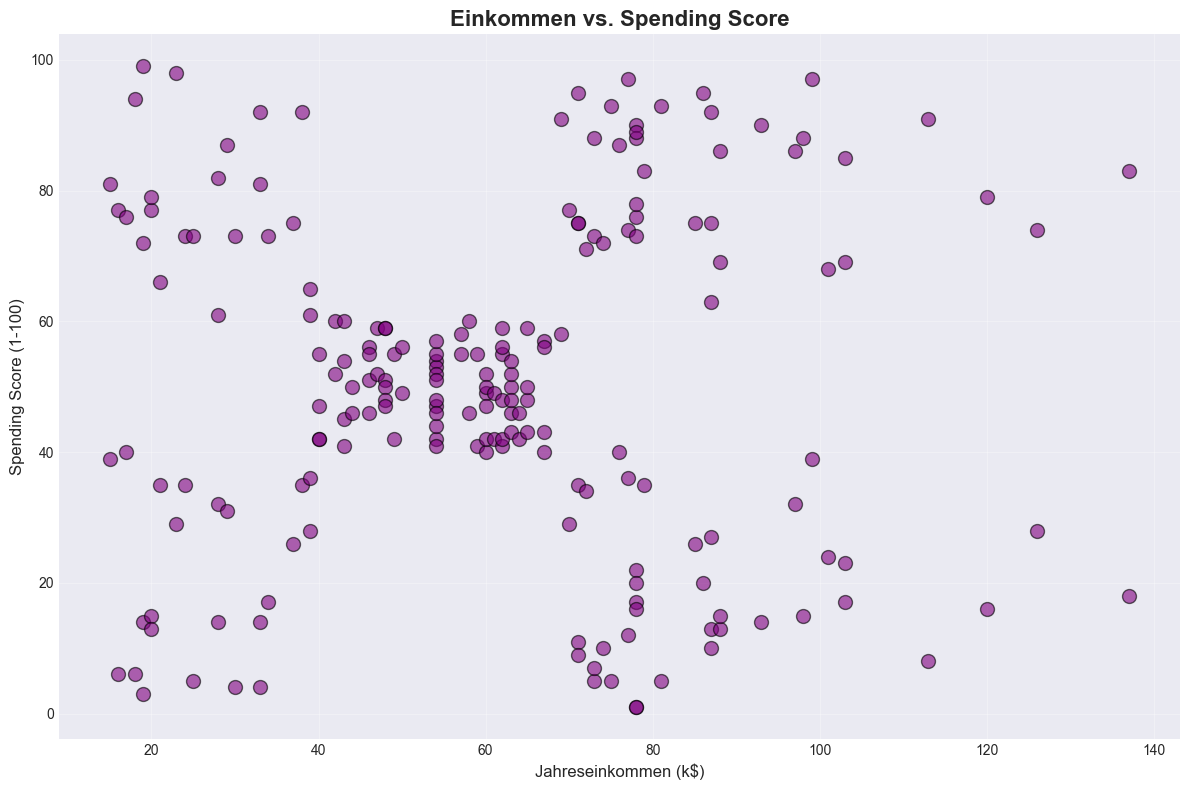

Scatter Plot gespeichert in outputs/04_income_vs_spending.png


In [22]:
# Einkommen vs. Spending Score
plt.figure(figsize=(12, 8))
plt.scatter(df['Annual Income (k$)'],
            df['Spending Score (1-100)'],
            s=100,
            alpha=0.6,
            c='purple',
            edgecolors='black')
plt.title('Einkommen vs. Spending Score', fontsize=16, fontweight='bold')
plt.xlabel('Jahreseinkommen (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/04_income_vs_spending.png', dpi=300, bbox_inches='tight')
plt.show()
print("Scatter Plot gespeichert in outputs/04_income_vs_spending.png")

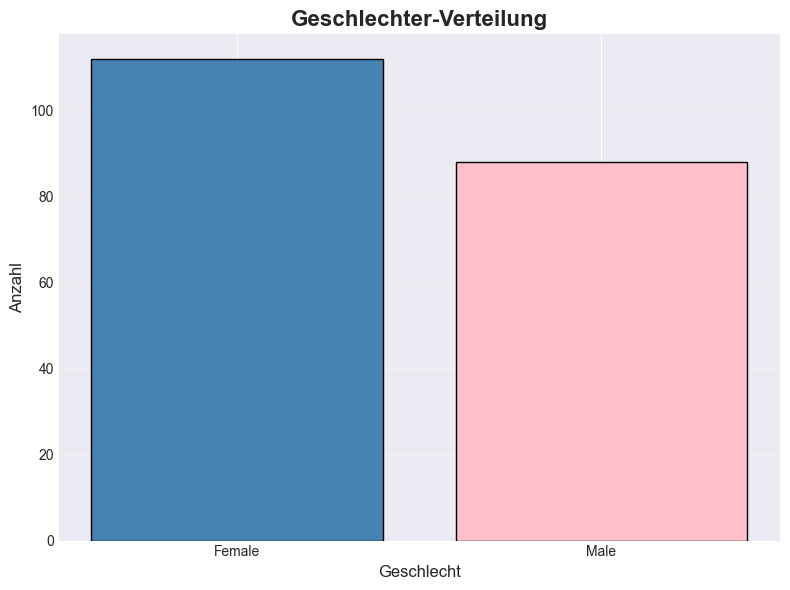

Geschlechter-Verteilung gespeichert in outputs/05_gender_distribution.png


In [23]:
# Geschlechter_Verteilung als Bar Chart
plt.figure(figsize=(8, 6))
gender_counts= df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['steelblue', 'pink'], edgecolor='black')
plt.title('Geschlechter-Verteilung', fontsize=16, fontweight='bold')
plt.xlabel('Geschlecht', fontsize=12)
plt.ylabel('Anzahl', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/05_gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Geschlechter-Verteilung gespeichert in outputs/05_gender_distribution.png")


In [24]:
# Die optimalen Cluster durch K-Means
# Features auswählen(NUR Annual Income und Spending Score)
print("=" * 50)
print("FEATURE SELECTION")
print("=" * 50)

features =['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

print(f"Features ausgewählt: {features}")
print(f"Shape der Daten: {X.shape}")
print("\nErste 5 Zeilen:")
display(X.head())

FEATURE SELECTION
Features ausgewählt: ['Annual Income (k$)', 'Spending Score (1-100)']
Shape der Daten: (200, 2)

Erste 5 Zeilen:


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [30]:
# Daten skalieren
print("=" * 50)
print("DATEN SKALIERUNG")
print("=" * 50)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print("Daten wurden skaliert!")
print("\nVorher (Original):")
display(X.head())
print("\nNacher (Skaliert):")
display(X_scaled_df.head())

print("\nStatistiken der skalierten Daten:")
print(f"Mittelwert: {X_scaled_df.mean().values}")
print(f"Standardabweichung: {X_scaled_df.std().values}")

DATEN SKALIERUNG
Daten wurden skaliert!

Vorher (Original):


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40



Nacher (Skaliert):


,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980



Statistiken der skalierten Daten:
Mittelwert: [-2.13162821e-16 -1.46549439e-16]
Standardabweichung: [1.00250941 1.00250941]


In [31]:
# Elbow-Methode -> Optimales K finden
print("=" * 50)
print("ELBOW-METHODE")
print("=" * 50)
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}")
print("\nAlle K-Werte getestet!")

ELBOW-METHODE
K=1: Inertia=400.00
K=2: Inertia=269.69
K=3: Inertia=157.70
K=4: Inertia=108.92
K=5: Inertia=65.57
K=6: Inertia=55.06
K=7: Inertia=44.86
K=8: Inertia=37.23
K=9: Inertia=32.39
K=10: Inertia=29.98

Alle K-Werte getestet!


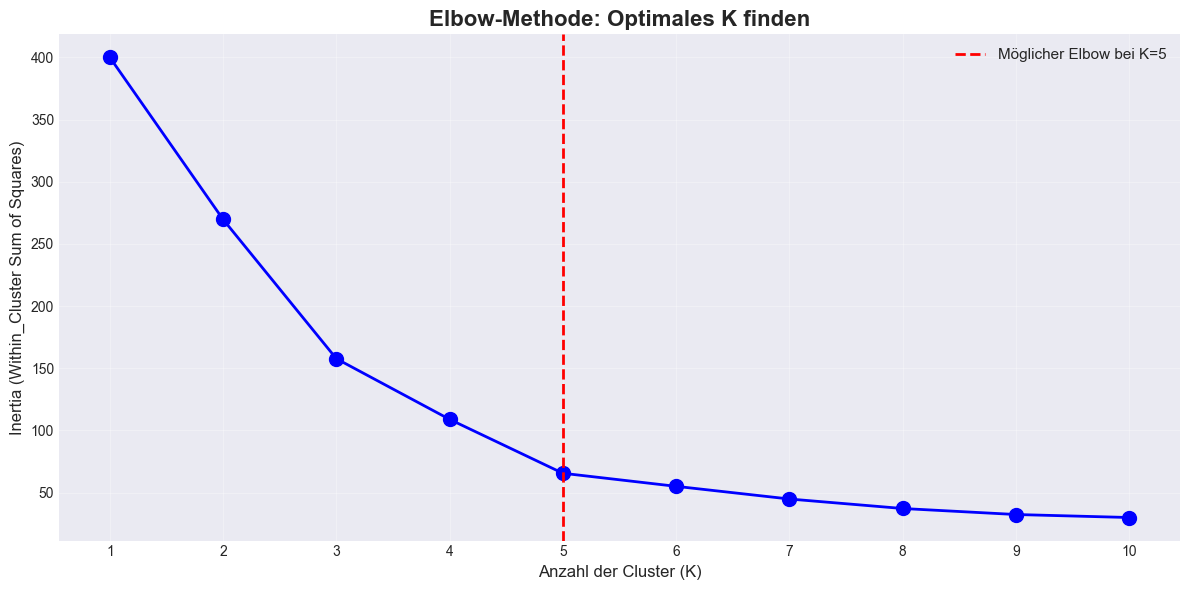

Elbow-Plot gespeichert in outputs/07_elbow_method.png


In [32]:
# Elbow-Plot visualisieren
plt.figure(figsize=(12, 6))
plt.plot(K_range, inertias, "bo-", linewidth=2, markersize=10)
plt.xlabel('Anzahl der Cluster (K)', fontsize=12)
plt.ylabel('Inertia (Within_Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow-Methode: Optimales K finden', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

# Markiere K=5
plt.axvline(x=5, color='red', linestyle='--', linewidth=2, label='Möglicher Elbow bei K=5')
plt.legend(fontsize=11)

plt.tight_layout()
plt.savefig('../outputs/07_elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()

print("Elbow-Plot gespeichert in outputs/07_elbow_method.png")

In [35]:
# K-Means mit optimalem K anwenden (K=5)
print("=" * 50)
print("K-MEANS CLUSTERING")
print("=" * 50)

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# "Cluster-Spalte" zum DataFrame hinzufügen
df['Cluster'] = clusters

print(f" K-Means erfolgreichdurchgeführt mit K={optimal_k}!")
print(f"\n Cluster-Verteilung:")
print(df['Cluster'].value_counts().sort_index())

print("\n Cluster-Zentren (skaliert): ")
print(kmeans.cluster_centers_)

K-MEANS CLUSTERING
 K-Means erfolgreichdurchgeführt mit K=5!

 Cluster-Verteilung:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

 Cluster-Zentren (skaliert): 
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


In [36]:
# Cluster-Zentren zurück-transformieren  
print("=" * 50)
print("CLUSTER-ZENTREN (ORIGINAL-SKALA)")
print("=" * 50)

centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers_original, columns=features)
centers_df['Cluster'] = range(optimal_k)

print(centers_df)
print("\nDas sind die 'Mittelpunkte' jeder Kundengruppe!")

CLUSTER-ZENTREN (ORIGINAL-SKALA)
   Annual Income (k$)  Spending Score (1-100)  Cluster
0           55.296296               49.518519        0
1           86.538462               82.128205        1
2           25.727273               79.363636        2
3           88.200000               17.114286        3
4           26.304348               20.913043        4

Das sind die 'Mittelpunkte' jeder Kundengruppe!


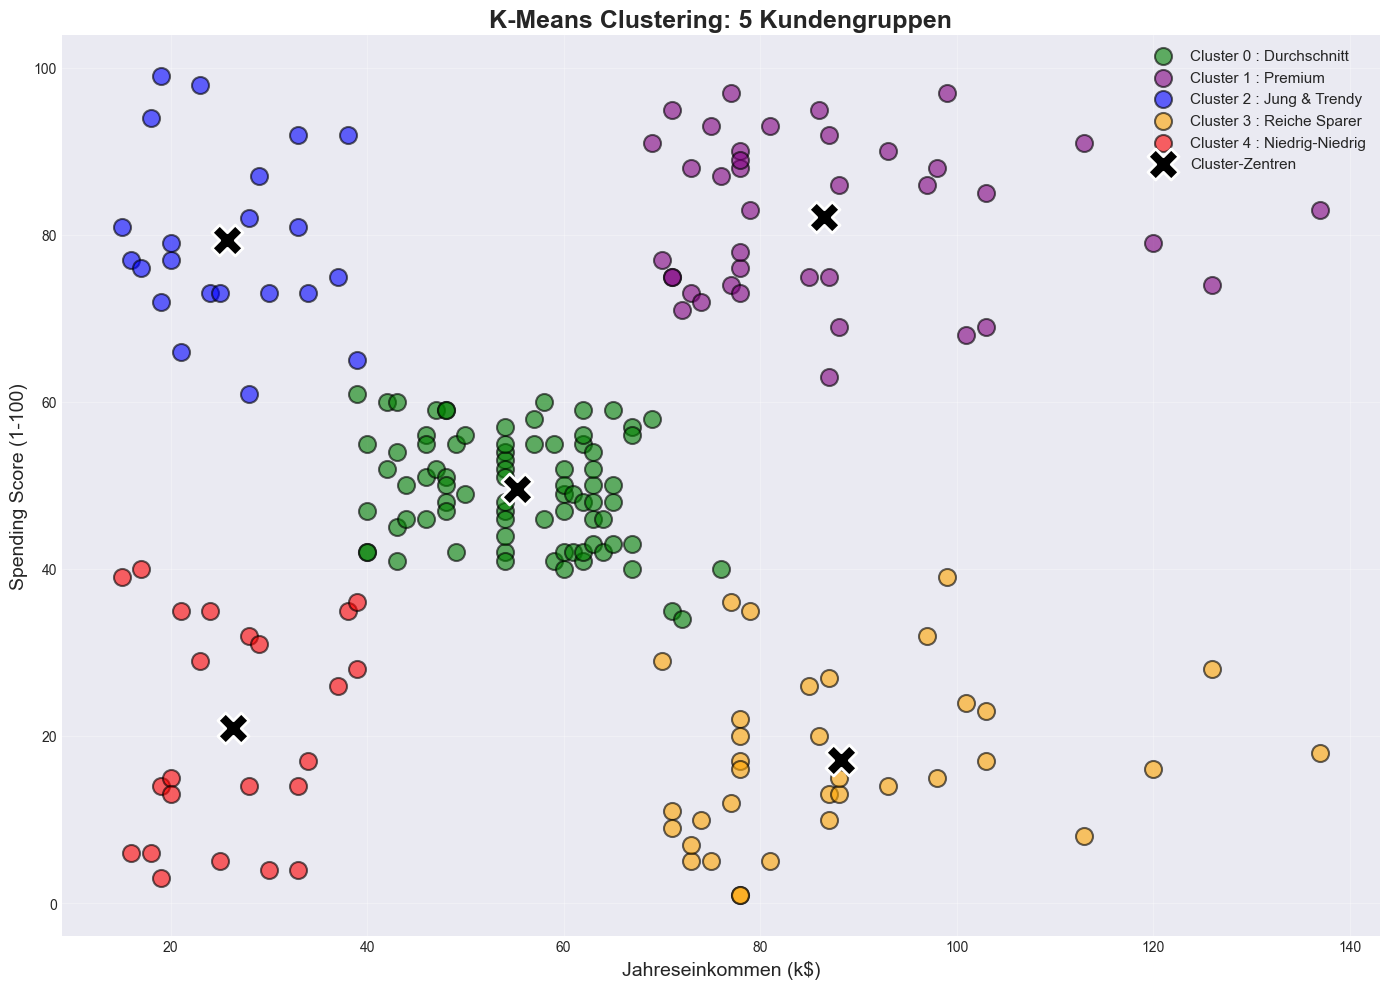

Cluster-Visialisierung gespeichert!


In [38]:
# Cluster visualisieren
plt.figure(figsize=(14, 10))
colors = ['green', 'purple', 'blue', 'orange', 'red']
cluster_names = [
    'Cluster 0 : Durchschnitt',
    'Cluster 1 : Premium',
    'Cluster 2 : Jung & Trendy',
    'Cluster 3 : Reiche Sparer',
    'Cluster 4 : Niedrig-Niedrig'
]
# Plotte jeden Cluster mit eigener Farbe
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'],
               cluster_data['Spending Score (1-100)'],
               s=150,
               c=colors[i],
               label=cluster_names[i],
               alpha=0.6,
               edgecolors='black',
               linewidth=1.5)
    
# Plotte die Cluster-Zentren als große schwarze X
centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers_original[:, 0],
            centers_original[:, 1],
            s=500,
            c='black',
            marker='X',
            edgecolors='white',
            linewidth=2,
            label='Cluster-Zentren',
            zorder=10)
plt.title('K-Means Clustering: 5 Kundengruppen', fontsize=18, fontweight='bold')
plt.xlabel('Jahreseinkommen (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/08_kmeans_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

print("Cluster-Visialisierung gespeichert!")

In [39]:
# Detaillierte Cluster-Statistiken
print("=" * 70)
print("DETAILLIERTE CLUSTER-ANALYSE")
print("=" * 70)

for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    print(f"\n{'='*70}")
    print(f"{cluster_names[i]}")
    print(f"{'='*70}")
    print(f"Anzahl Kunden: {len(cluster_data)}")
    print(f"Prozent: {len(cluster_data)/len(df)*100:.1f}%")
    print(f"\nDurchschnittliches Alter: {cluster_data['Age'].mean():.1f} Jahre")
    print(f"Durchschnittliches Einkommen: {cluster_data['Annual Income (k$)'].mean():.1f}k $")
    print(f"Durchschnittliches Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}")
    print(f"\nGeschlechter-Verteilung:")
    print(cluster_data['Gender'].value_counts())
    

DETAILLIERTE CLUSTER-ANALYSE

Cluster 0 : Durchschnitt
Anzahl Kunden: 81
Prozent: 40.5%

Durchschnittliches Alter: 42.7 Jahre
Durchschnittliches Einkommen: 55.3k $
Durchschnittliches Spending Score: 49.5

Geschlechter-Verteilung:
Gender
Female    48
Male      33
Name: count, dtype: int64

Cluster 1 : Premium
Anzahl Kunden: 39
Prozent: 19.5%

Durchschnittliches Alter: 32.7 Jahre
Durchschnittliches Einkommen: 86.5k $
Durchschnittliches Spending Score: 82.1

Geschlechter-Verteilung:
Gender
Female    21
Male      18
Name: count, dtype: int64

Cluster 2 : Jung & Trendy
Anzahl Kunden: 22
Prozent: 11.0%

Durchschnittliches Alter: 25.3 Jahre
Durchschnittliches Einkommen: 25.7k $
Durchschnittliches Spending Score: 79.4

Geschlechter-Verteilung:
Gender
Female    13
Male       9
Name: count, dtype: int64

Cluster 3 : Reiche Sparer
Anzahl Kunden: 35
Prozent: 17.5%

Durchschnittliches Alter: 41.1 Jahre
Durchschnittliches Einkommen: 88.2k $
Durchschnittliches Spending Score: 17.1

Geschlechter-Verte

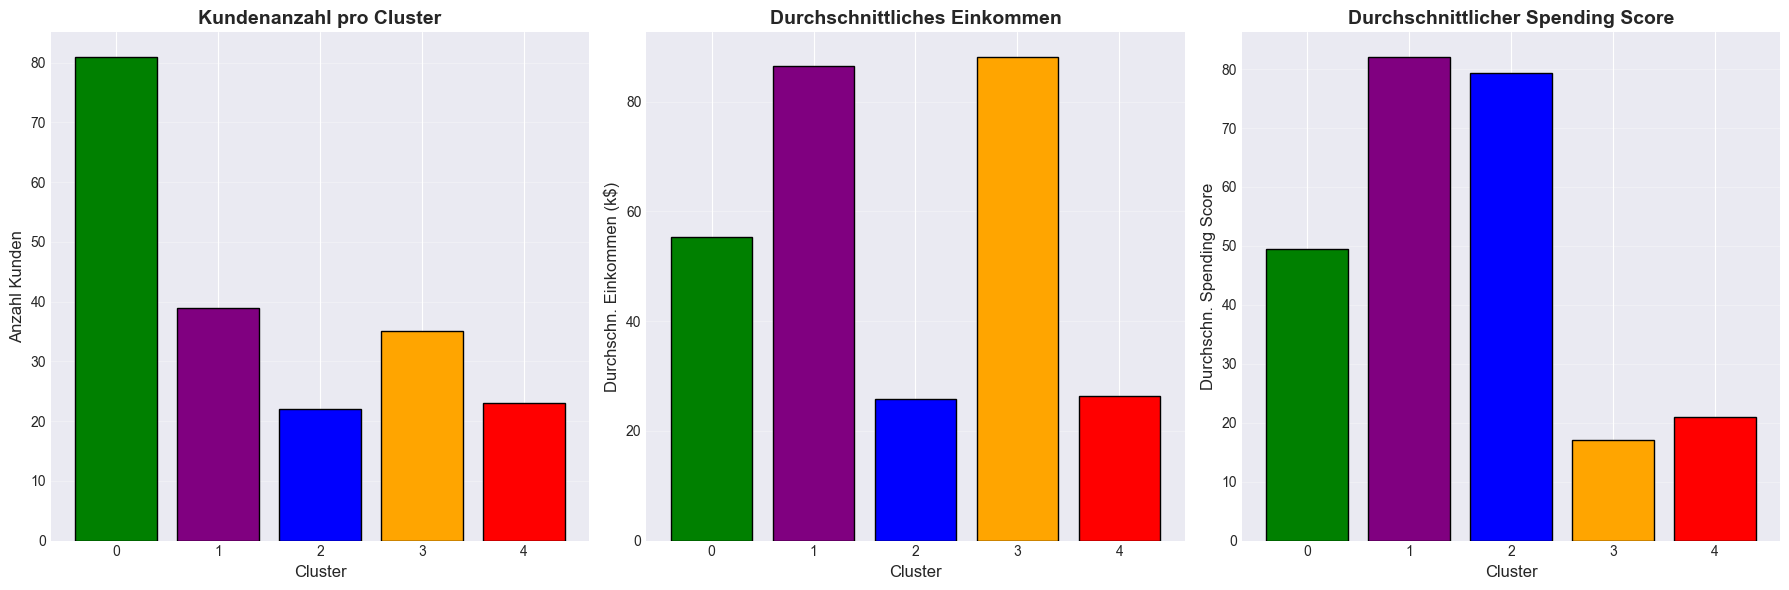

Cluster-Vergleich gespeichert!


In [41]:
# Cluster-Vergleich als Balkendiagramm
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Anzahl pro Cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
axes[0].bar(range(optimal_k), cluster_counts.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Cluster', fontsize=12)
axes[0].set_ylabel('Anzahl Kunden', fontsize=12)
axes[0].set_title('Kundenanzahl pro Cluster', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(optimal_k))
axes[0].grid(axis='y', alpha=0.3)

# Plot 2 : durchschnittliches Einkommen pro Cluster
avg_income = df.groupby('Cluster')['Annual Income (k$)'].mean()
axes[1].bar(range(optimal_k), avg_income.values, color=colors, edgecolor='black')
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Durchschn. Einkommen (k$)', fontsize=12)
axes[1].set_title('Durchschnittliches Einkommen', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(optimal_k))
axes[1].grid(axis='y', alpha=0.3)

# Plot 3: Durchschnittlichher Spending Score pro Cluster
avg_spending = df.groupby('Cluster')['Spending Score (1-100)'].mean()
axes[2].bar(range(optimal_k), avg_spending.values, color=colors, edgecolor='black')
axes[2].set_xlabel('Cluster', fontsize=12)
axes[2].set_ylabel('Durchschn. Spending Score', fontsize=12)
axes[2].set_title('Durchschnittlicher Spending Score', fontsize=14, fontweight='bold')
axes[2].set_xticks(range(optimal_k))
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/09_cluster_comparsion.png', dpi=300, bbox_inches='tight')
plt.show()

print("Cluster-Vergleich gespeichert!")

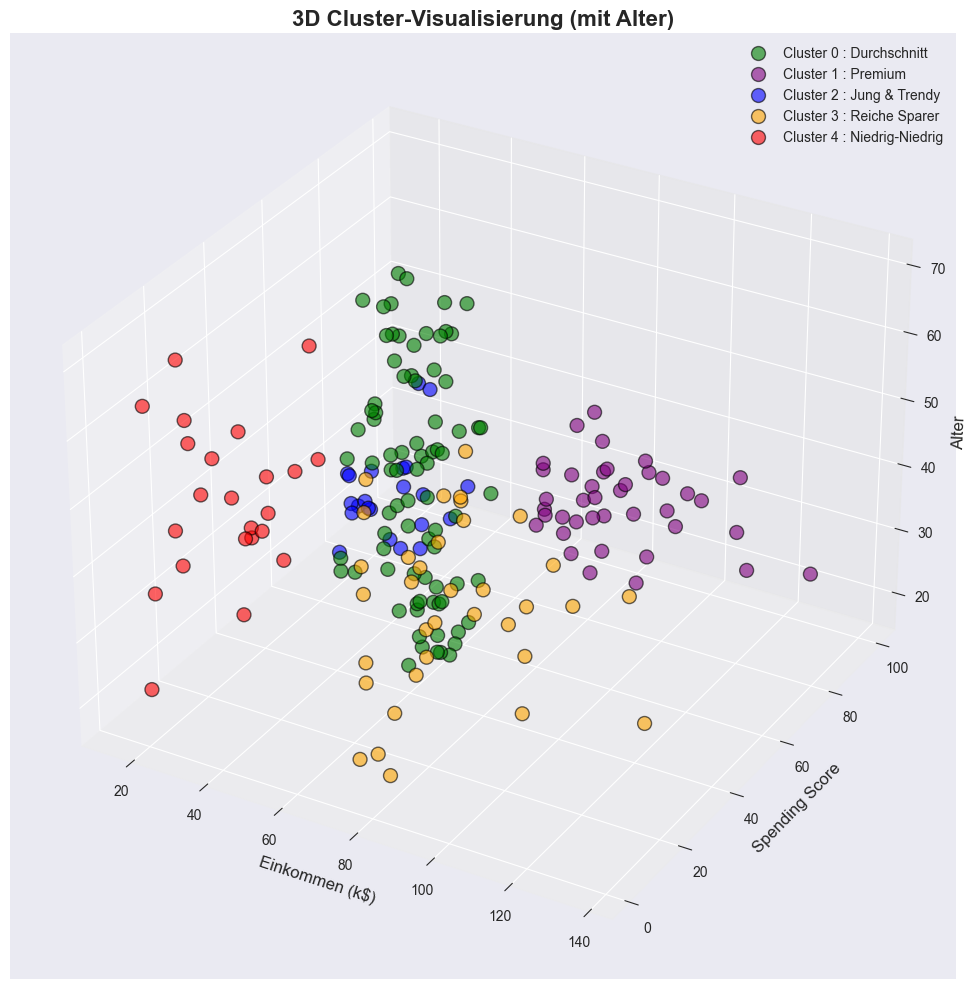

3D-Visualisierung gespeichert!


In [45]:
# 3D Visualisierung

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(optimal_k):
    cluster_data= df[df['Cluster'] == i]
    ax.scatter(cluster_data['Annual Income (k$)'],
               cluster_data['Spending Score (1-100)'],
               cluster_data['Age'],
               s=100,
               c=colors[i],
               label=cluster_names[i],
               alpha=0.6,
               edgecolors='black')

ax.set_xlabel('Einkommen (k$)', fontsize=12)
ax.set_ylabel('Spending Score', fontsize=12)
ax.set_zlabel('Alter', fontsize=12)
ax.set_title('3D Cluster-Visualisierung (mit Alter)', fontsize=16, fontweight='bold')
ax.legend(fontsize=10)

plt.tight_layout()
plt.savefig('../outputs/10_3d_clustering.png', dpi=300, bbox_inches='tight')
plt.show()
print("3D-Visualisierung gespeichert!")

In [48]:
# Zelle 26: ROI-Analyse - Welcher Cluster ist am wertvollsten?
print("\n" + "=" * 80)
print(" ROI-ANALYSE: WELCHER CLUSTER BRINGT AM MEISTEN UMSATZ?")
print("=" * 80)

# Berechne potentiellen Umsatz 
# Annahme: Umsatz = Einkommen * Spending Score / 100 * Anzahl Kunden
df['Potential_Value'] = df['Annual Income (k$)'] * df['Spending Score (1-100)'] / 100

cluster_value = df.groupby('Cluster').agg({
    'Potential_Value': ['sum', 'mean'],
    'CustomerID': 'count'
}).round(2)

cluster_value.columns = ['Gesamt-Potenzial', 'Potenzial pro Kunde', 'Anzahl Kunden']
cluster_value = cluster_value.sort_values('Gesamt-Potenzial', ascending=False)

print("\n CLUSTER-RANKING nach Umsatz-Potenzial:")
print(cluster_value)


 ROI-ANALYSE: WELCHER CLUSTER BRINGT AM MEISTEN UMSATZ?

 CLUSTER-RANKING nach Umsatz-Potenzial:
         Gesamt-Potenzial  Potenzial pro Kunde  Anzahl Kunden
Cluster                                                      
1                 2769.55                71.01             39
0                 2205.31                27.23             81
3                  541.56                15.47             35
2                  447.31                20.33             22
4                  129.86                 5.65             23


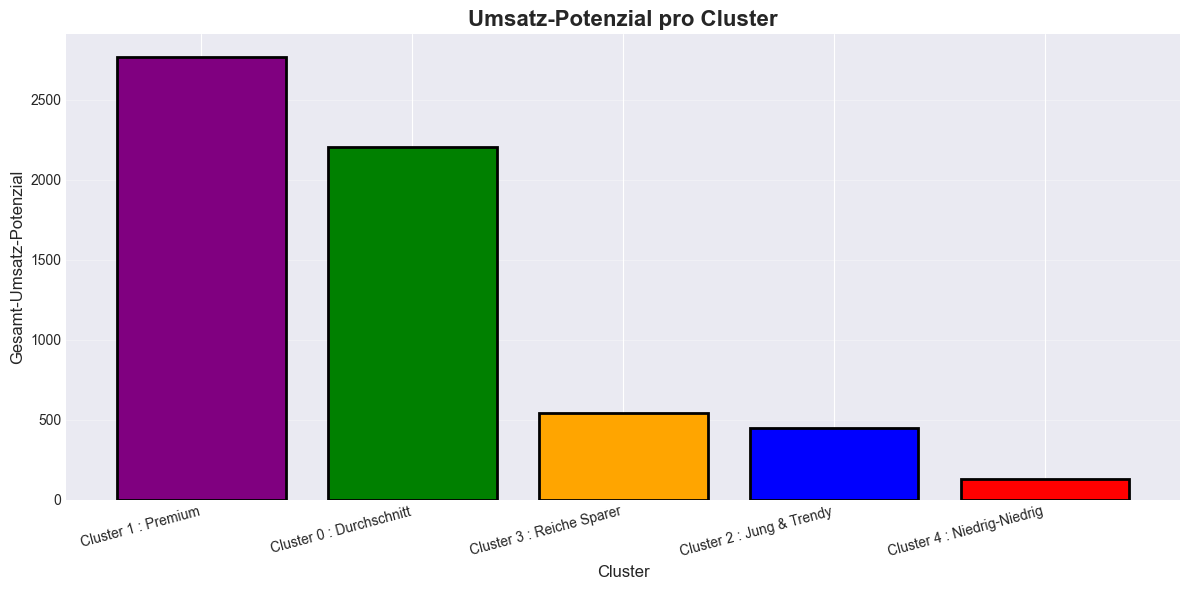


ROI-Analyse gespeichert!


In [49]:
# Visualisierung
plt.figure(figsize=(12, 6))
colors_sorted = [colors[i] for i in cluster_value.index]
plt.bar(range(len(cluster_value)),
        cluster_value['Gesamt-Potenzial'],
        color=colors_sorted,
        edgecolor='black',
        linewidth=2)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Gesamt-Umsatz-Potenzial', fontsize=12)
plt.title('Umsatz-Potenzial pro Cluster', fontsize=16, fontweight='bold')
plt.xticks(range(len(cluster_value)), [cluster_names[i] for i in cluster_value.index], rotation=15, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/11_cluster_value.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nROI-Analyse gespeichert!")
